
# Project - Fake or Real news detection

<img src="pic1.jpg">

# Introduction

<img src="pic2.png">

Is the above information fake or real ? Its not real, twitter was hacked and these kind of false information was spread. But the  problem is not only hackers sending false information by hacking the accounts. 

The main and bigger problem is what we call “Fake News”. It’s well-known that news is the part of communication that keeps us informed of changing events, issues, and characters in the world, the status, or even just the community. However, due to rapid development of technology, getting reliable news is becoming harder and harder as now mostly news is just word of mouth without any authenticity of facts or figures. They are those news stories which are fabricated as no sources are verified .Due to the rise in online social media and networking ,fake news is spreading in large numbers whether for commercial or political reasons. It often has the aim of damagingthe reputation of a person or entity, or making money through advertising revenue. 

Distinguishing fake news and real news is an important and urgent task as it help in improving the trustworthiness of information in online social networks. In this project we aim to explore the principles, methodologies as well as algorithms mainly by detecting the language patterns that characterize fake and real news through the use of machine learning and natural language processing techniques, from online social networks and other sources and assessing the equivalent performance.

# Data description

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

There are two datasets which contain 59.88 MB fake news and 51.1 MB real news. 

Each dataset has the same set of variables, title, text, subject and date for each news set. Each row represents one news item; it gives us information about the title of the article, the content of the article(text), on which date it was posted and also it represents which field, namely politics or world news etc. We have roughly as many real news as fake news. It may be helpful for us to do future predictions, since we don’t need to oversample or undersample our dataset.

## 1. Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## 2. Import the dataset

In [2]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.shape, real.shape

((23481, 4), (21417, 4))

## 3. Data visualization and preprocessing

### 3-1. Check for null values

In [6]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

There are no null values in both the datasets. We merge both real and fake news dataset and we added one extra column which is binary type called category, it distinguishes real from fake news, takes value 0 when fake and 1 when real. To make sure our data is not biased we reshuffled our dataset.

### 3-2. Insert the lable and merge two datasets

In [8]:
# fake news for 0, real news for 1
fake['category'] = 0
real['category'] = 1

In [17]:
import sklearn
from sklearn.utils import shuffle

news = pd.concat([real, fake], ignore_index = True, sort = False)
news = shuffle(news)

news

,title,text,subject,date,category
35591,TWO “HIGH THREAT” EXPLOSIVE Experts Moved From...,If someone would have told me in 2008 that we ...,politics,"Apr 4, 2016",0
20339,Romania names new minister to modernize military,BUCHAREST (Reuters) - Romania s leftist govern...,worldnews,"September 12, 2017",1
11480,Japan's emperor draws record birthday crowd as...,TOKYO (Reuters) - A record crowd paid their re...,worldnews,"December 23, 2017",1
37399,BURN! SEBASTIAN GORKA HUMILIATES MSNBC On Use ...,It s probably not the wisest decision to argue...,Government News,"Aug 8, 2017",0
443,"Factbox: Five facts about Tom Cotton, Trump's ...",WASHINGTON (Reuters) - U.S. Senator Tom Cotton...,politicsNews,"November 30, 2017",1
...,...,...,...,...,...
4388,U.S. strikes in Syria show resolve against che...,BRUSSELS (Reuters) - European Council Presiden...,politicsNews,"April 7, 2017",1
35192,CORRUPT STATE DEPARTMENT Deletes Key Info From...,This is seriously concerning! James Rosen call...,politics,"Jun 2, 2016",0
5223,White House says no ethanol executive order in...,(Reuters) - The White House on Tuesday said th...,politicsNews,"February 28, 2017",1
30910,NEW FINDINGS SHOW TWO IMPORTANT Words Were Del...,The word crooked doesn t only apply to Hilla...,politics,"Nov 7, 2017",0


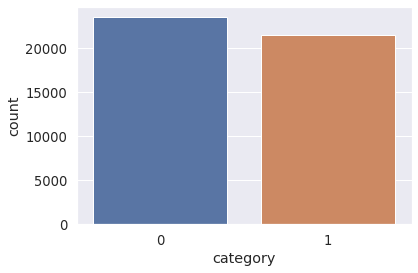

In [18]:
sns.set_style("darkgrid")
sns.countplot(news.category)

From the above graph we can see we dont have an unbalanced data as there are approximately same number of counts in both the dataset

In [19]:
news.shape

(44898, 5)

### 3-3. Data cleaning

#### Check 'title' column

In [20]:
news['title'].count()

44898

There is no duplicate data

#### Check 'subject' column distribition

In [21]:
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politics'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'politicsNews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

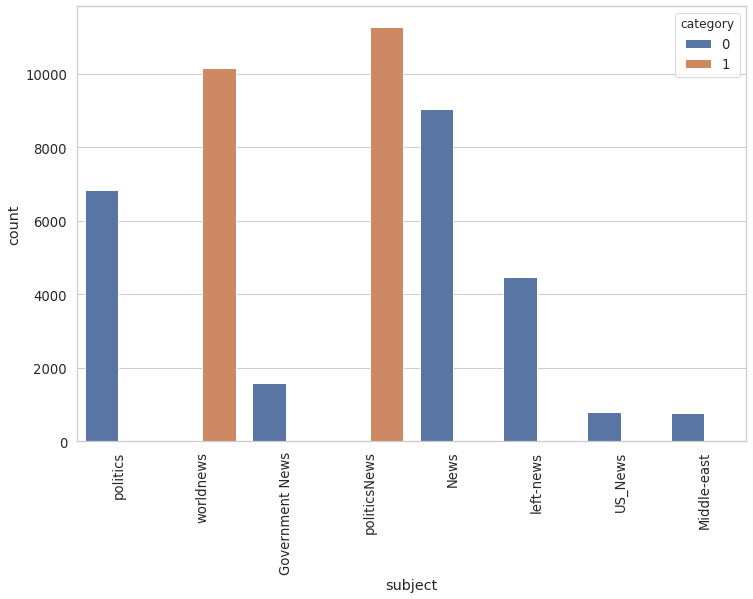

In [22]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid", font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

We plot the above graph to see the topics (subjects) related to fake and real news. Real news belongs to only two genres that is political news and world news and fake news is more spread and has many topics of discussion including politics, Government news etc.

As the subjects column is not equally distributed we decided to drop the subject column from our dataset, as we don't want those to influence the accuracy of the model. We also decided to drop the date column as date is not helpful or we can't find any pattern in dates to determine any correlation between the news and dates.

In the dataset we see that title and text are both important columns and in text format, therefore for ease of developing a model we decide to combine them in a single new column called text and dropping the previous text and title column.

#### Merge text and title column and delete unnecessary column

In [23]:
news['text'] = news['title'] + " " + news['text']
del news['title']
del news['subject']
del news['date']

In [24]:
news

,text,category
35591,TWO “HIGH THREAT” EXPLOSIVE Experts Moved From...,0
20339,Romania names new minister to modernize milita...,1
11480,Japan's emperor draws record birthday crowd as...,1
37399,BURN! SEBASTIAN GORKA HUMILIATES MSNBC On Use ...,0
443,"Factbox: Five facts about Tom Cotton, Trump's ...",1
...,...,...
4388,U.S. strikes in Syria show resolve against che...,1
35192,CORRUPT STATE DEPARTMENT Deletes Key Info From...,0
5223,White House says no ethanol executive order in...,1
30910,NEW FINDINGS SHOW TWO IMPORTANT Words Were Del...,0


### 3-4. Normalize / split the data into training and testing, and tokenize

Supervised machine learning algorithm uses historical data to learn patterns and uncover relationships between other features of the dataset and the target. The target variable of a dataset is the feature of a dataset about which we want to gain a deeper understanding therefore in this dataset we set category as our target variable as it diffrentiates real and fake news and we chose text as out feature to trin our model.

#### Split the features and labels

In [25]:
features = news['text']
targets = news['category']

#### Normalizing our data: lower case, get rid of extra spaces, and url links.

In [26]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

#### Split into training and testing - test portion of 20%

In the following cell we will use the function train_test_split() to split our data, we imported model_selection from scikit-learn. By specifying the test_size as 0.20, we aim to put 80% of the data into our training set, and the rest 20% of the data into the test set. 

We specified the random state as if we do not specify the random_state in the code, then with each run new values will be created and the results will not be stable considering the accuracy change, owing to different values of train and test for each execution.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state = 42)

In [29]:
X_train[123]

'Republican tax bill retains U.S. electric vehicle tax credit WASHINGTON (Reuters) - A compromise Republican tax bill released late Friday does not eliminate a $7,500 electric vehicle tax credit as Republicans in the U.S. House of Representatives had previously proposed. The measure follows the lead of the Senate version approved last month that did not eliminate the credit. Killing the credit could have hurt automakers like General Motors Co (GM.N), Volkswagen AG (VOWG_p.DE), Tesla Inc (TSLA.O) and Nissan Motor Co (7201.T). Consumers under current law are eligible for a $7,500 tax credit to defray the cost of plug-in electric vehicles. The electric vehicle tax credit starts to phase out after a manufacturer sells 200,000 plug-in vehicles. After an automaker hits that point, the $7,500 tax credit is still available for at least three more months before phasing out.  Consumers are currently allowed to take the credit on vehicles until the manufacturer hits 200,000 plug-in vehicles sold.

##### normalize the features

In [30]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [31]:
X_train[123]

'us advising soldiers to be less masculine as military tries to curb flood of sexual harassment cases 170619 n aa175 092 san diego june 19 2017 command master chief ret kathleen henson from midland mich center and uss makin island lhd 8 sailors cut a cake during the lesbian gay bisexual and transgender pride month observance makin island is homeported in san diego u s navy photo by mass communication specialist 2nd class eric zeak published at wikicommons 21st century wire says while military forces are fighting one enemy in the theatre of combat another multi front culture war is also being fought within their institutions according to a recent report in military com us military lawyers have begun speaking about how sexual assault cases are flooding the military courts threatening to break the back of the military s legal system and perhaps radically alter the institutional culture after the release of the documentary the invisible war the issue of sexual assault in the military has a

### 3.5 - Tokenizing the dataset

Neural nerworks don't take raw text as input, they only work with numeric tensors. Vectorizing text is the process of transforming text into numeric tensors. In the next cell we start with tokenisation of data that is converting text into a set of integer sequence.

<li>First we build an indexed vocabulary out of the words appearing in our dataset, with the fit_on_texts method. It updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. It is word index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word</li>
<li>After the vocabulary has been built, we use the text_to_sequences method to convert sentences into a list of numbers representing words for both trainnig and testing set</li>
<li>The pad_sequences function make sure that all observations are of the same length, set to either a random number or to the length of the longest question in the dataset</li>

In [32]:
max_vocab = 10000
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(X_train)

In [33]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [34]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding = 'post', maxlen = 256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding = 'post', maxlen = 256)

In [35]:
X_train[123]

array([1207,  624,  229,    9, 1817, 5200, 1402,   28,   63,  114, 5441,
         55, 1056,    2,  768, 3100, 1344,  259,    3,    1,  968,  583,
         25,  114, 4274,   48, 3507,   26, 6471, 3791,   11,   23, 1966,
          2,    1,  112,   18,    1, 6471,  393,    3,  132, 5067,    5,
         64,    3, 1817, 2203,  649,   11,  384,   64,  168,  217,  365,
        577,    7,  968,  432,  311,  142,  185,   18,    5,   24,  101,
         44, 2012,    1, 1394, 1862, 1160,  155,    1, 5753, 3070,    1,
       1234,   22,   10,    1,  700,   45,  987, 2651,   48,   41,   56,
          1, 4695, 9700,    7,  566,   21,   63,   22, 2012,  101, 1367,
        326,  263,    1,  565,  566,  546,    3,  259,    3,    1,  457,
         28, 3351,    2,  129, 7542,    1,   93,  913, 5753,   17, 6813,
         19,    1, 1325, 3094, 2717,    5, 6333, 2615,   50,   21, 3324,
          1, 7862,    3,  122, 2342,  352,    1,  112,  179,   11,  311,
       2442, 9122,  206,   18, 8784, 5938, 1092,   

## 4. Model Creation - RNN

#### We have used NLP(Natural Language Processing) and RNN(Recurrent Neural Networks) for our model.

In the next part, we build and train our model. It has 2 main layers namely Embedding layer and Dense output layer the first will learn from our training data that we prepared above and the latter implements the classification task

<li>The first layer will be the embedding layer which has the input of vocabulary size an doutput dimension as 32 i.e each word will be represented by a vector of 32 dimensions.</li>
<li>After that we add two hidden layer Stacked Bi-LSTM (Long Short-Term Memory), the first one with 64 neurons and second one with 16 neurons, and for the first layer we set return_sequences = True which enbles Keras to know that LSTM output should contain all historical generated outputs along with time stamps (3D). So, next LSTM layer can work further on the data. We used bidirectional LSTM as Bi-LSTM can predict the future use of words as there is backward information passed on from the other RNN layer in reverse </li>
<li>At last we add teh dense layer with 64 layers and one neuron. We used Relu as our activation function because gradient of relu is always equal to 1, this way we can pass the maximum amount of the error though the network during back-propagation. ReLu learns much faster than tanh and sigmoid and also less computationally as it involves simpler mathematical operations</li>
<li>To prevent overfitting we added a 50% dropout layer and Early stopping method</li>
<li>Lastly we compile the model using adam optimizer and binary cross-entropy as loss function since we have only two outputs as its a classifiation Problem</li>

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (N

In [37]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2, 
                                              restore_best_weights = True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In the next part, we fit our model to find teh accuracy. We further divide our trainng data and keep 10% for cross validation and remaining 90% to actually retrain the data. We are using cross validation to make sure that the model is not overfitting the training data. We take 10 epochs and in each epoch we check the error on both validation and trainig data.

In [38]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, 
                    batch_size = 30, shuffle = True, callbacks = [early_stop])

Train on 32326 samples, validate on 3592 samples
Epoch 1/10
32326/32326 [==============================] - 870s 27ms/sample - loss: 0.2753 - acc: 0.8468 - val_loss: 0.0982 - val_acc: 0.9724
Epoch 2/10
32326/32326 [==============================] - 866s 27ms/sample - loss: 0.0548 - acc: 0.9841 - val_loss: 0.0591 - val_acc: 0.9808
Epoch 3/10
32326/32326 [==============================] - 870s 27ms/sample - loss: 0.0286 - acc: 0.9928 - val_loss: 0.0281 - val_acc: 0.9916
Epoch 4/10
32326/32326 [==============================] - 869s 27ms/sample - loss: 0.0242 - acc: 0.9939 - val_loss: 0.0345 - val_acc: 0.9903
Epoch 5/10
32326/32326 [==============================] - 871s 27ms/sample - loss: 0.0105 - acc: 0.9978 - val_loss: 0.0433 - val_acc: 0.9883


#### The model stops its training by 5th epochs, which means the validation loss stop improving.
#### We got around 99% of accuracy of our training dataset

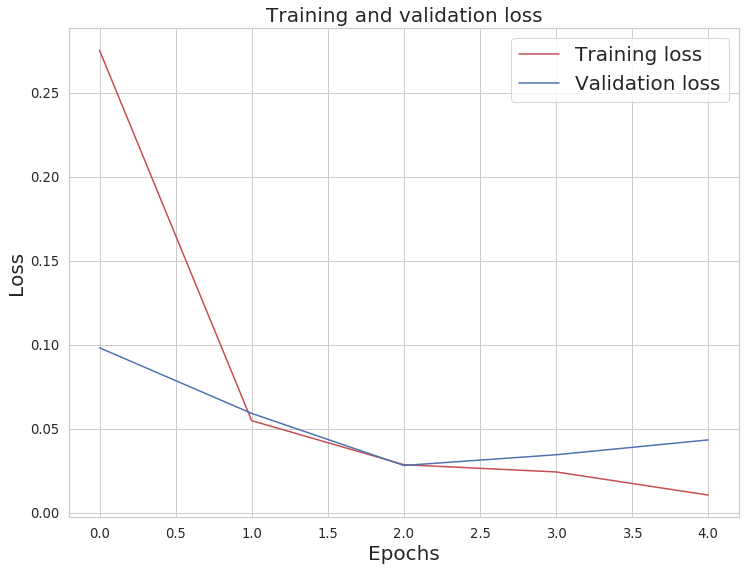

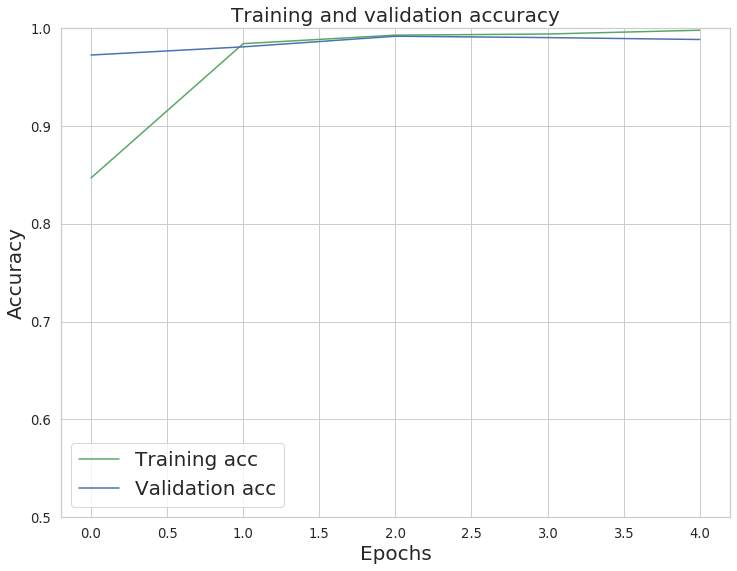

In [39]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [40]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

8980/8980 [==============================] - 36s 4ms/sample - loss: 0.0337 - acc: 0.9899


#### We got a training accuracy of 99.71% and testing of around 98.99% , as there is not much difference in the train and test accuracy we can say that our model is not overfitting the data

#### Let's extract the scores

In [41]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [42]:
print('Accuracy on testing set: ', accuracy_score(binary_predictions, y_test))
print('Precision on testing set: ', precision_score(binary_predictions, y_test))
print('Recall on testing set: ', recall_score(binary_predictions, y_test))

Accuracy on testing set:  0.9898663697104677
Precision on testing set:  0.9869767441860465
Recall on testing set:  0.9918205188128068


#### Metrics for the model

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

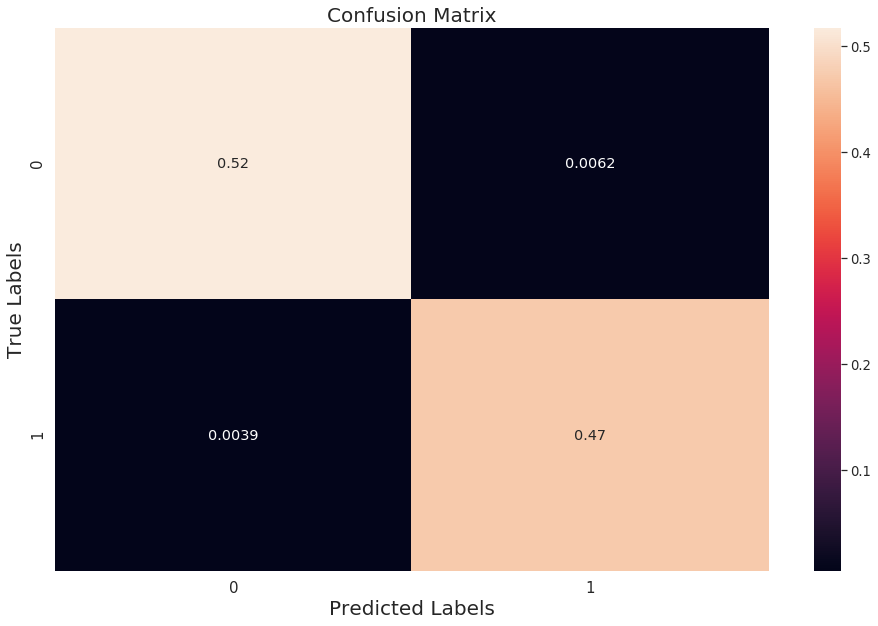

In [43]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

## 5. Single prediction -  Is today's news real / fake?

In order to make this project more meaningful and practical, we just wanted to predict whether the today’s news is fake or real. This is one of today’s news from CNN about Warren Buffet is worth $100 Billion.

### 5-1. Load necessary library

In [44]:
import re
from pprint import pprint
import csv
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen

### 5-2. Text scraping from webpage using BeautifilSoup

#### BeautifulSoup helps us extract text only from HTML

In [45]:
def text_scraping(url):
    page = urlopen(url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    
    for script in soup(['script', 'style']):
        script.decompose()
    
    text = list(soup.stripped_strings)
    text = ' '.join(text)
    
    return text

In [46]:
url = 'https://www.cnn.com/2021/03/11/business/warren-buffett-net-worth-intl-hnk/index.html'

#### From this webpage, we did web scraping using BeautifilSoup which helps retrieve texts only from HTML. 

In [48]:
todayNews = text_scraping(url)
print(todayNews)

Warren Buffett, Berkshire Hathaway CEO, is now worth $100 billion - CNN Markets Tech Media Success Perspectives Videos Edition U.S. International Arabic Español Search CNN Open Menu Markets Tech Media Success Perspectives Videos Search Edition U.S. International Arabic Español Markets Premarkets Dow After-Hours Market Movers Fear & Greed World Markets Investing Markets Now Before the Bell Leading Indicator Global Energy Challenge Economy Tracking America's Recovery Energy Tech Innovate Gadget Foreseeable Future Mission: Ahead Upstarts Business Evolved Innovative Cities Unhackable Media Reliable Sources Success Boss Files Risk Takers Fresh Money Invest Ahead Work Transformed Cars Homes Wealth Coach Center Piece Perspectives Videos International Switzerland India Davos Reliable Sources Passion to Portfolio On: Germany More Accessibility & CC About Us Newsletters US World Politics Business Opinion Health Entertainment Tech Style Travel Sports Videos Audio Coupons Weather More Follow CNN B

### 5-3. Normalize texts and tokenize

In [49]:
todayNews = todayNews.lower()
# get rid of urls
todayNews = re.sub('https?://\S+|www\.\S+', '', todayNews)
# get rid of non words and extra spaces
todayNews = re.sub('\\W', ' ', todayNews)
todayNews = re.sub('\n', '', todayNews)
todayNews = re.sub(' +', ' ', todayNews)
todayNews = re.sub('^ ', '', todayNews)
todayNews = re.sub(' $', '', todayNews)

In [50]:
todayNews

'warren buffett berkshire hathaway ceo is now worth 100 billion cnn markets tech media success perspectives videos edition u s international arabic español search cnn open menu markets tech media success perspectives videos search edition u s international arabic español markets premarkets dow after hours market movers fear greed world markets investing markets now before the bell leading indicator global energy challenge economy tracking america s recovery energy tech innovate gadget foreseeable future mission ahead upstarts business evolved innovative cities unhackable media reliable sources success boss files risk takers fresh money invest ahead work transformed cars homes wealth coach center piece perspectives videos international switzerland india davos reliable sources passion to portfolio on germany more accessibility cc about us newsletters us world politics business opinion health entertainment tech style travel sports videos audio coupons weather more follow cnn business warr

In [56]:
from itertools import chain

# tokenize texts into vector
tokenizedTodayNews = tokenizer.texts_to_sequences(todayNews)
# convert to number of list
tokenizedTodayNews = list(chain.from_iterable(tokenizedTodayNews))
# the first 256 numbers: the same as padding size
tokenizedTodayNews = tokenizedTodayNews[:256]
# convert to array which is the same as X_test dataset
tokenizedTodayNews = np.array(tokenizedTodayNews)

tokenizedTodayNews

array([1104,    4, 1102, 1102, 1471,  324, 1442,   35, 1020, 1020, 1471,
         38,   38, 1442, 1471, 1102, 2564,    7, 1820,   32, 1102, 1471,
       1820,    4,   38, 1820,    4, 1104,    4, 4379,  998, 1471,  835,
         32,    7,  324,  835, 1104, 1104,  835, 1102,   38, 1820,  193,
       1590, 1590, 1442,   32, 3157, 3157,   32,  835,  324,  998,  324,
        324,  241,    4, 1102, 2564, 1471,   38,    7,   38, 1471,  998,
       1820,  241, 1471,  304,   32,    4,    7,   35,  998,  998, 1471,
          7,    7, 1466, 1471, 1102,    7, 1466, 1471,  998,   38,   32,
       2979, 1471,    7, 2979,   32,  304, 1471,  835,    7, 1471,  304,
         32,   38,   32,  835,  324,   35,    7,   32,  324,   38, 1471,
       1102,  324,    4,   38,   32,  835,  324,    4, 3157,    4, 1102,
          4, 1442,   32,  998, 1471,    7, 1466,    4,  835, 3157,    7,
       1471,    4, 1102,  998, 1820,  998,  324,  324,  835, 1466, 1471,
        324,  241, 1471,  324,   35,  241,    4, 11

### 5-3. Calculate the score and predict whether the news is real or fake 

In [58]:
# merge X_test and our tokenized news
X_test2 = np.vstack((X_test, tokenizedTodayNews))
single_pred = model.predict(X_test2)

In [59]:
# our single prediction news is the last one
score = single_pred[-1]
print('The score is:', score, ', which means')
if score >= 0.5:
    print('Our model predicts this news is REAL')
else:
    print('Our model predicts this news is FAKE')

The score is: [-9.103716] , which means
Our model predicts this news is FAKE


#### Our neural network predicts this news is FAKE news